# L²Space and L2Function Demo: Comprehensive Guide

This notebook demonstrates the usage of the `L2Space` class for working with L² Hilbert spaces on intervals. 

## Mathematical Background

L² spaces are Hilbert spaces of square-integrable functions with the inner product:
$$⟨u,v⟩_{L²} = \int_a^b u(x)v(x) \, dx$$

Our implementation provides:
- **L² Hilbert spaces** on intervals [a,b] with Fourier basis functions
- **L2Function instances** that properly handle mathematical restrictions (e.g., point evaluation warnings)
- **Integration and coefficient transformations** between function and coefficient representations
- **Inner products and norms** computed via numerical integration

Let's explore all the functionality step by step!

## 1. Import Required Libraries

We'll import NumPy for numerical operations, matplotlib for plotting, and our L2Space classes.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the pygeoinf package to path
sys.path.append('/home/adrian/PhD/Inferences/pygeoinf')

# Import our L2 space classes
from pygeoinf.other_space.l2_space import L2Space
from pygeoinf.other_space.l2_functions import L2Function

print("Successfully imported all required libraries!")
print("Ready to work with L² spaces!")

Successfully imported all required libraries!
Ready to work with L² spaces!


## 2. Create L2Space Instances

Let's create L² Hilbert spaces with different configurations:
- Different dimensions (number of basis functions)
- Different intervals (domains)
- Periodic boundary conditions with Fourier basis

In [12]:
# Create a simple L2 space on [0, 1] with 5 basis functions
space1 = L2Space(5, 'fourier', interval=(0, 1))
print(f"Space 1: dimension={space1.dim}, interval={space1.interval}")
print(f"Boundary conditions: {space1.boundary_conditions}")

# Create L2 space on [0, 2π] with 7 basis functions
space2 = L2Space(7, 'fourier', interval=(0, 2*np.pi))
print(f"\nSpace 2: dimension={space2.dim}, interval={space2.interval}")

# Create L2 space on [-1, 1] with 9 basis functions
space3 = L2Space(9, 'fourier', interval=(-1, 1))
print(f"\nSpace 3: dimension={space3.dim}, interval={space3.interval}")

print(f"\nAll spaces use basis type: {space1._basis_type}")
print(f"Space 1 length: {space1._length}")
print(f"Space 2 length: {space2._length}")
print(f"Space 3 length: {space3._length}")

Space 1: dimension=5, interval=(0, 1)
Boundary conditions: {'type': 'periodic'}

Space 2: dimension=7, interval=(0, 6.283185307179586)

Space 3: dimension=9, interval=(-1, 1)

All spaces use basis type: fourier
Space 1 length: 1
Space 2 length: 6.283185307179586
Space 3 length: 2


## 3. Explore Basis Functions

Let's examine the Fourier basis functions that form our L² space. For periodic boundary conditions, we get:
- Constant function (k=0)
- Cosine and sine functions with increasing frequencies

In [13]:
# Examine basis functions for space1
print(f"Space1 has {len(space1.basis_functions)} basis functions:")
for i, basis_func in enumerate(space1.basis_functions):
    print(f"  Basis {i}: {basis_func.name}")

# Look at the Gram matrix (should be approximately identity for orthonormal basis)
print(f"\nGram matrix shape: {space1.gram_matrix.shape}")
print("Gram matrix (should be close to identity for orthonormal basis):")
print(np.round(space1.gram_matrix, 4))

# Check if basis functions are approximately orthonormal
print(f"\nIs Gram matrix close to identity? {np.allclose(space1.gram_matrix, np.eye(space1.dim), atol=1e-10)}")

# Examine basis functions for space2 (larger space)
print(f"\nSpace2 basis functions:")
for i, basis_func in enumerate(space2.basis_functions):
    print(f"  Basis {i}: {basis_func.name}")

Space1 has 5 basis functions:
  Basis 0: constant
  Basis 1: cos_1
  Basis 2: sin_1
  Basis 3: cos_2
  Basis 4: sin_2

Gram matrix shape: (5, 5)
Gram matrix (should be close to identity for orthonormal basis):
[[ 1.  0.  0.  0. -0.]
 [ 0.  1. -0. -0.  0.]
 [ 0. -0.  1.  0.  0.]
 [ 0. -0.  0.  1. -0.]
 [-0.  0.  0. -0.  1.]]

Is Gram matrix close to identity? True

Space2 basis functions:
  Basis 0: constant
  Basis 1: cos_1
  Basis 2: sin_1
  Basis 3: cos_2
  Basis 4: sin_2
  Basis 5: cos_3
  Basis 6: sin_3


## 4. Create and Manipulate L2 Functions

Now let's create L2Function instances in different ways:
1. Using coefficient arrays
2. Using evaluation callables
3. Performing arithmetic operations

In [14]:
# Method 1: Create function using coefficients
coeffs1 = np.array([1.0, 0.0, 0.5, 0.0, 0.3])  # Coefficients for basis functions
func1 = space1.create_function(coefficients=coeffs1, name="func1_from_coeffs")
print(f"Created function: {func1.name}")
print(f"Coefficients: {func1.coefficients}")

# Method 2: Create function using evaluation callable
def my_test_function(x):
    """A simple test function: sin(2πx)"""
    return np.sin(2 * np.pi * x)

func2 = space1.create_function(evaluate_callable=my_test_function, name="sin_function")
print(f"\nCreated function: {func2.name}")

# Method 3: Get individual basis functions and combine them
basis_0 = space1.basis_functions[0]  # Constant
basis_1 = space1.basis_functions[1]  # First cosine
basis_2 = space1.basis_functions[2]  # First sine

# Create a linear combination manually
func3 = 2.0 * basis_0 + 1.5 * basis_1 + 0.8 * basis_2
func3.name = "manual_combination"
print(f"\nCreated function: {func3.name}")

# Test arithmetic operations
func_sum = func1 + func2
func_sum.name = "sum_function"
print(f"\nArithmetic operations successful!")
print(f"func1 + func2 = {func_sum.name}")

# Test scalar multiplication
func_scaled = 2.0 * func1
func_scaled.name = "scaled_function"
print(f"2.0 * func1 = {func_scaled.name}")

Created function: func1_from_coeffs
Coefficients: [1.  0.  0.5 0.  0.3]

Created function: sin_function

Created function: manual_combination

Arithmetic operations successful!
func1 + func2 = sum_function
2.0 * func1 = scaled_function


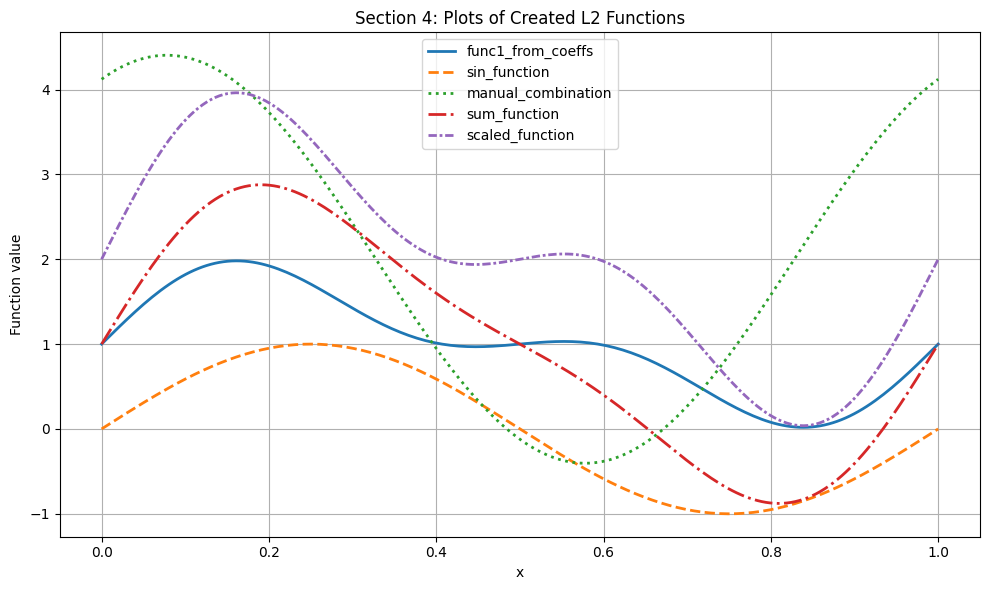

In [19]:
# Plot all functions created in section 4
x_plot = np.linspace(space1.interval[0], space1.interval[1], 200)
plt.figure(figsize=(10, 6))

# Evaluate and plot each function
for f, label, style in [
    (func1, 'func1_from_coeffs', '-'),
    (func2, 'sin_function', '--'),
    (func3, 'manual_combination', ':'),
    (func_sum, 'sum_function', '-.'),
    (func_scaled, 'scaled_function', (0, (3, 1, 1, 1)))]:
    try:
        y = f.evaluate(x_plot)
        plt.plot(x_plot, y, linestyle=style, label=label, linewidth=2)
    except Exception as e:
        print(f"Could not plot {label}: {e}")

plt.title("Section 4: Plots of Created L2 Functions")
plt.xlabel("x")
plt.ylabel("Function value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Compute Inner Products and Norms

The L² inner product is defined as $⟨u,v⟩_{L²} = \int_a^b u(x)v(x) \, dx$.

Let's compute inner products and norms for our functions.

In [15]:
# Compute inner products between functions
inner_product_12 = space1.l2_inner_product(func1, func2)
print(f"⟨func1, func2⟩_L² = {inner_product_12:.6f}")

inner_product_11 = space1.l2_inner_product(func1, func1)
print(f"⟨func1, func1⟩_L² = {inner_product_11:.6f}")

# Compute L² norms (||u||² = ⟨u,u⟩)
norm_func1 = np.sqrt(inner_product_11)
norm_func2 = np.sqrt(space1.l2_inner_product(func2, func2))
print(f"\n||func1||_L² = {norm_func1:.6f}")
print(f"||func2||_L² = {norm_func2:.6f}")

# Test orthogonality of basis functions
print(f"\nBasis orthogonality tests:")
basis_inner_01 = space1.l2_inner_product(space1.basis_functions[0], space1.basis_functions[1])
basis_inner_02 = space1.l2_inner_product(space1.basis_functions[0], space1.basis_functions[2])
basis_inner_12 = space1.l2_inner_product(space1.basis_functions[1], space1.basis_functions[2])

print(f"⟨basis_0, basis_1⟩ = {basis_inner_01:.10f}")
print(f"⟨basis_0, basis_2⟩ = {basis_inner_02:.10f}")
print(f"⟨basis_1, basis_2⟩ = {basis_inner_12:.10f}")

# Verify that the basis functions have unit norm
for i, basis in enumerate(space1.basis_functions):
    basis_norm = np.sqrt(space1.l2_inner_product(basis, basis))
    print(f"||basis_{i}||_L² = {basis_norm:.6f}")

⟨func1, func2⟩_L² = 0.353553
⟨func1, func1⟩_L² = 1.340000

||func1||_L² = 1.157584
||func2||_L² = 0.707107

Basis orthogonality tests:
⟨basis_0, basis_1⟩ = 0.0000000000
⟨basis_0, basis_2⟩ = 0.0000000000
⟨basis_1, basis_2⟩ = -0.0000000000
||basis_0||_L² = 1.000000
||basis_1||_L² = 1.000000
||basis_2||_L² = 1.000000
||basis_3||_L² = 1.000000
||basis_4||_L² = 1.000000


## 6. Visualize Functions and Basis

Let's plot our basis functions and created L2 functions to see their behavior on the interval.

**Important Note**: L² functions don't have well-defined pointwise values mathematically, but we can plot their smooth representatives (if they exist) for visualization.

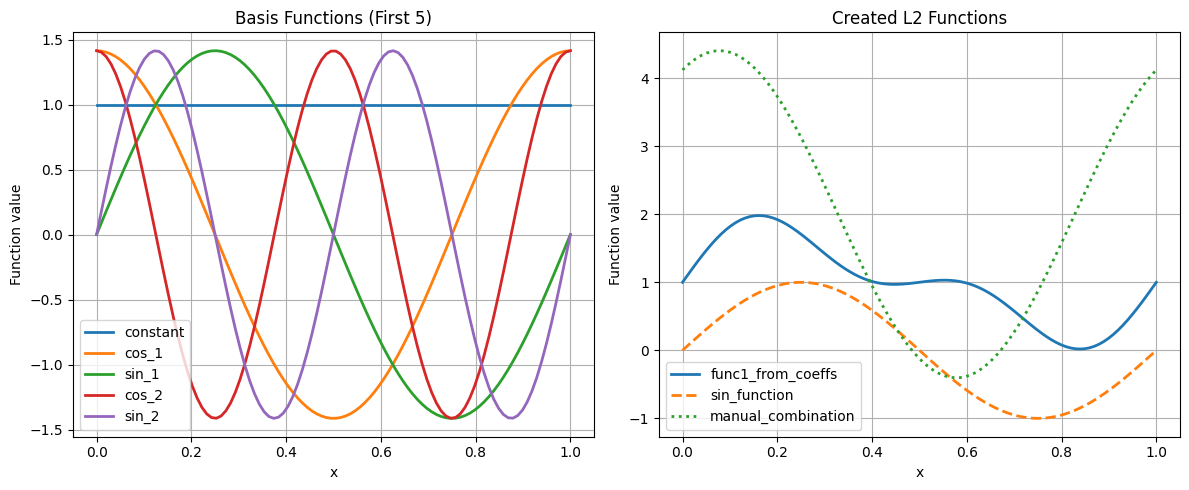

Note: These plots show the smooth representatives of L² functions.
Mathematically, L² functions don't have well-defined pointwise values!


In [16]:
# Create evaluation points for plotting
x = np.linspace(space1.interval[0], space1.interval[1], 100)

# Plot basis functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first few basis functions
ax1.set_title("Basis Functions (First 5)")
for i, basis_func in enumerate(space1.basis_functions):
    # We'll evaluate the basis function (this gives a warning for L² functions, but works for plotting)
    try:
        y = basis_func.evaluate(x)  # Remove the suppress_warning parameter
        ax1.plot(x, y, label=f'{basis_func.name}', linewidth=2)
    except Exception as e:
        print(f"Could not plot basis function {i}: {e}")

ax1.set_xlabel('x')
ax1.set_ylabel('Function value')
ax1.legend()
ax1.grid(True)

# Plot our created functions
ax2.set_title("Created L2 Functions")
try:
    y1 = func1.evaluate(x)  # Remove suppress_warning parameter
    y2 = func2.evaluate(x)
    y3 = func3.evaluate(x)

    ax2.plot(x, y1, label=func1.name, linewidth=2)
    ax2.plot(x, y2, label=func2.name, linewidth=2, linestyle='--')
    ax2.plot(x, y3, label=func3.name, linewidth=2, linestyle=':')

except Exception as e:
    print(f"Error plotting functions: {e}")

ax2.set_xlabel('x')
ax2.set_ylabel('Function value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Note: These plots show the smooth representatives of L² functions.")
print("Mathematically, L² functions don't have well-defined pointwise values!")

## 7. Work with Function Coefficients

The L2Space provides methods to convert between function representations and coefficient arrays:
- `to_components(u)`: Extract coefficients from a function
- `from_components(coeffs)`: Create a function from coefficients

In [17]:
# Extract coefficients from existing functions
coeffs_func1 = space1.to_components(func1)
coeffs_func2 = space1.to_components(func2)

print("Original coefficients for func1:", coeffs1)
print("Extracted coefficients for func1:", np.round(coeffs_func1, 6))
print("Match?", np.allclose(coeffs1, coeffs_func1))

print(f"\nExtracted coefficients for func2 (sin function):")
print(np.round(coeffs_func2, 6))

# Create new functions from coefficients
test_coeffs = [0.5, 1.0, 0.0, -0.8, 0.3]
func_from_coeffs = space1.from_components(test_coeffs)
func_from_coeffs.name = "reconstructed_function"

# Verify round-trip: coeffs -> function -> coeffs
test_extracted = space1.to_components(func_from_coeffs)
print(f"\nRound-trip test:")
print("Original coefficients:", test_coeffs)
print("Extracted coefficients:", np.round(test_extracted, 10))
print("Round-trip successful?", np.allclose(test_coeffs, test_extracted))

# Test coefficient manipulation
modified_coeffs = coeffs_func1 + 0.1 * coeffs_func2
func_modified = space1.from_components(modified_coeffs)
func_modified.name = "modified_combination"
print(f"\nCreated modified function: {func_modified.name}")

# Verify that coefficient operations correspond to function operations
func_direct = func1 + 0.1 * func2
func_direct.name = "direct_combination"

coeffs_modified = space1.to_components(func_modified)
coeffs_direct = space1.to_components(func_direct)

print("Coefficients from modified_coeffs:", np.round(coeffs_modified, 6))
print("Coefficients from direct operation:", np.round(coeffs_direct, 6))
print("Linear operations commute?", np.allclose(coeffs_modified, coeffs_direct))

Original coefficients for func1: [1.  0.  0.5 0.  0.3]
Extracted coefficients for func1: [ 1.  -0.   0.5 -0.   0.3]
Match? True

Extracted coefficients for func2 (sin function):
[-0.        0.        0.707107  0.        0.      ]

Round-trip test:
Original coefficients: [0.5, 1.0, 0.0, -0.8, 0.3]
Extracted coefficients: [ 0.5  1.   0.  -0.8  0.3]
Round-trip successful? True

Created modified function: modified_combination
Coefficients from modified_coeffs: [ 1.       -0.        0.570711 -0.        0.3     ]
Coefficients from direct operation: [ 1.        0.        0.570711 -0.        0.3     ]
Linear operations commute? True


## 8. Demonstrate Integration Operations

L2Functions support integration over their domain intervals, which is mathematically well-defined even for general L² functions.

In [18]:
# Test integration operations
try:
    # Integration is mathematically well-defined for L² functions
    integral_func1 = func1.integrate()
    integral_func2 = func2.integrate()

    print(f"∫ func1 dx over {space1.interval} = {integral_func1:.6f}")
    print(f"∫ func2 dx over {space1.interval} = {integral_func2:.6f}")

    # Integration of basis functions
    print(f"\nIntegration of basis functions:")
    for i, basis_func in enumerate(space1.basis_functions):
        integral = basis_func.integrate()
        print(f"∫ {basis_func.name} dx = {integral:.6f}")

    # The constant basis function should integrate to sqrt(interval_length)
    # Other trigonometric functions should integrate to 0 (over full periods)

except AttributeError as e:
    print(f"Integration method not yet implemented: {e}")
    print("Integration is mathematically valid for L² functions but may need implementation.")

# Alternative: compute integrals using inner product with constant function
print(f"\nUsing inner product with constant for integration:")

# Get the constant basis function (first one)
constant_basis = space1.basis_functions[0]
print(f"Constant basis function: {constant_basis.name}")

# Inner product with constant gives integral (up to normalization)
integral_via_inner1 = space1.l2_inner_product(func1, constant_basis)
integral_via_inner2 = space1.l2_inner_product(func2, constant_basis)

print(f"⟨func1, constant⟩ = {integral_via_inner1:.6f}")
print(f"⟨func2, constant⟩ = {integral_via_inner2:.6f}")

# These are proportional to the integrals (need to account for normalization)

∫ func1 dx over (0, 1) = 1.000000
∫ func2 dx over (0, 1) = -0.000000

Integration of basis functions:
∫ constant dx = 1.000000
∫ cos_1 dx = 0.000000
∫ sin_1 dx = 0.000000
∫ cos_2 dx = 0.000000
∫ sin_2 dx = -0.000000

Using inner product with constant for integration:
Constant basis function: constant
⟨func1, constant⟩ = 1.000000
⟨func2, constant⟩ = -0.000000
